In [12]:
# %pip install torch torchvision --index-url https://download.pytorch.org/whl/cu126
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


# 활성화 함수 (Activation Function)


딥러닝의 **활성화 함수(Activation Function)** 란, 뉴런에서 계산된 값에 **비선형성(non-linearity)** 을 부여하여 모델이 복잡한 패턴을 학습할 수 있도록 도와주는 함수이다.


입력 신호를 받아 출력 신호로 바꿔주는 역할을 하며, 주로 은닉층과 출력층에서 사용된다.


**주요 활성화 함수 정리**


| 이름             | 수식 또는 특징                                  | 장점                        | 단점                            |
| -------------- | ----------------------------------------- | ------------------------- | ----------------------------- |
| **Sigmoid**    | `1 / (1 + exp(-x))`                       | 출력이 0\~1로 제한되어 확률처럼 해석 가능 | 기울기 소실(Vanishing Gradient) 문제 |
| **Tanh**       | `(exp(x) - exp(-x)) / (exp(x) + exp(-x))` | 출력이 -1\~1로 중심이 0          | 여전히 기울기 소실 문제 있음              |
| **ReLU**       | `max(0, x)`                               | 계산 간단, 빠름, 기울기 소실 문제 적음   | x<0이면 출력이 0이라 죽은 뉴런 발생 가능     |
| **Leaky ReLU** | `x if x>0 else αx (보통 α=0.01)`            | ReLU의 죽은 뉴런 문제 개선         | α값 선택이 임의적                    |
| **Softmax**    | `exp(xᵢ) / sum(exp(xⱼ))` (출력층에서 사용)       | 다중 클래스 분류에서 확률 출력         | 출력 간 상호의존성 있음                 |


---




**활성화 함수가 없다면** 딥러닝 모델은 선형 함수들의 조합에 불과해 어떤 복잡한 문제도 해결하지 못한다.


### 계단 함수 (Step Function)


$ f(x) = \begin{cases} 1, & x \geq 0 \\ 0, & x < 0 \end{cases}$


- 입력값이 0 이상이면 1, 그렇지 않으면 0 출력


**계단함수가 활성화함수로 사용되지 않는 이유**
1. 미분 불가능하다
  - 역전파(backpropagation)를 위해서는 미분 가능해야 하는데, 계단함수는 0에서 불연속이기 때문에 미분이 불가능하다.
2. 출력이 이산(discrete)적이다
  - 출력이 0 또는 1만 나와서 연속적인 출력 조정이 어렵다. 이는 학습의 세밀함을 떨어뜨린다.
3. 기울기(gradient)가 0이거나 undefined
  - 대부분의 구간에서 기울기가 0이기 때문에 가중치 업데이트가 거의 일어나지 않는다. 학습이 진행되지 않는다.
4. 비선형성이 약하고 표현력이 낮다
  - 함수 자체는 비선형이지만, 실제로 모델이 복잡한 관계를 학습하기에는 표현력이 떨어진다.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X = np.linspace(-5, 5, 100)

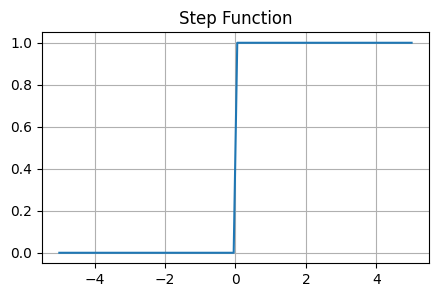

In [4]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

plt.figure(figsize=(5,3))
plt.plot(X, step_function(X))
plt.title('Step Function')
plt.grid(True)
plt.show()

### 시그모이드 함수 (Sigmoid Function)


$ f(x) = \frac{1}{1 + e^{-x}} $


- 출력 범위: (0, 1)
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

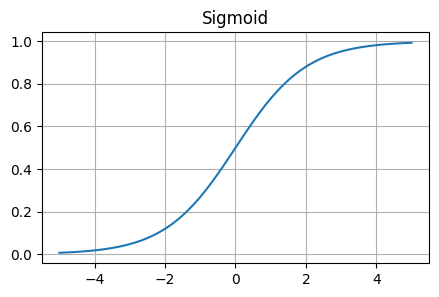

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.figure(figsize=(5,3))
plt.plot(X, sigmoid(X))
plt.title('Sigmoid')
plt.grid(True)
plt.show()

### 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent, Tanh)


$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $


- 출력 범위: (-1, 1)
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습 진행 가능
- 기울기 소실 문제 발생 가능


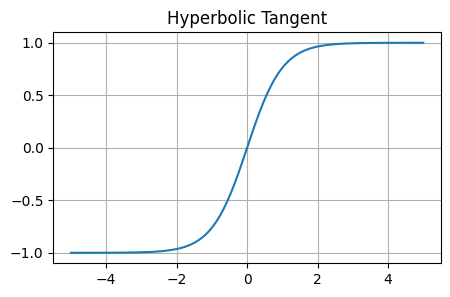

In [6]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

plt.figure(figsize=(5,3))
plt.plot(X, tanh(X))
plt.title('Hyperbolic Tangent')
plt.grid(True)
plt.show()

### ReLU (Rectified Linear Unit)


$ f(x) = \max(0, x) $


- 출력 범위: $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLU) 문제 발생 가능


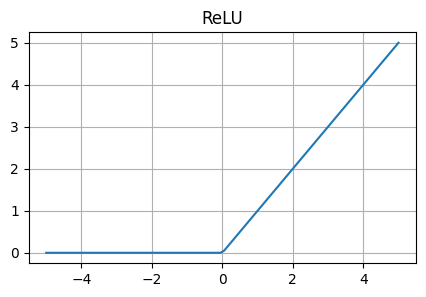

In [7]:
def relu(x):
    return np.maximum(0, x)
# ==> max : 최대값 1개 뽑아줌
# ==> maximum(0, x) 요소를 비교해서 각각 반환?

plt.figure(figsize=(5,3))
plt.plot(X, relu(X))
plt.title('ReLU')
plt.grid(True)
plt.show()

### Leaky ReLU


$ f(x) = \begin{cases} x, & x \geq 0 \\ \alpha x, & x < 0\end{cases}$


- 출력 범위: $(-\infty, \infty)$
- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$는 일반적으로 0.01 사용)


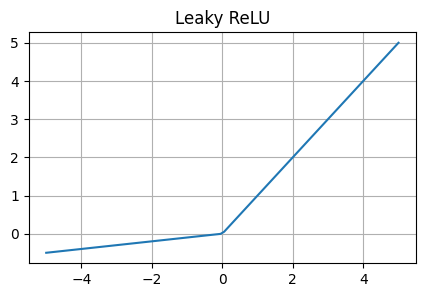

In [8]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

plt.figure(figsize=(5,3))
plt.plot(X, leaky_relu(X, alpha=0.1))
# ==> 기본적으로 0.01이나, 시각화를 위해 0.1 넣음
plt.title('Leaky ReLU')
plt.grid(True)
plt.show()

## Softmax
softmax 함수는 **출력값들을 확률처럼 보이게** 만들어주는 함수이다.


주로 **다중 클래스 분류 문제의 출력층**에서 사용한다.


**수식** (입력 벡터 $\mathbf{z} = [z_1, z_2, ..., z_K]$ 에 대해):


$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$


* $z_i$는 각 클래스에 대한 점수 (logit)
* $K$는 클래스의 총 개수
* 출력값은 **0\~1 사이의 값**이며, **전체 합이 1**이 된다 → 확률처럼 해석 가능

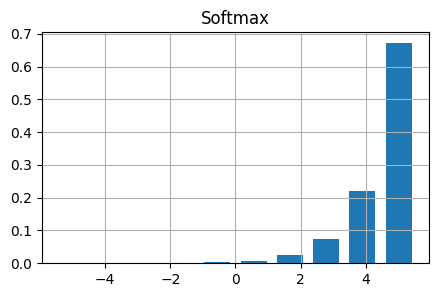

In [9]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # 오버플로우방지
    return exp_x / np.sum(exp_x, axis=0)

X = np.linspace(-5, 5, 10)

plt.figure(figsize=(5,3))
plt.bar(X, softmax(X))
plt.title('Softmax')
plt.grid(True)
plt.show()

In [10]:
# 활성화 함수에 따른 값의 분포

np.random.seed(42)

X =np.random.uniform(-5, 5, 10) # -5 ~ 5 사이 10개 숫자 샘플링
""" =>
array([-1.25459881,  4.50714306,  2.31993942,  0.98658484, -3.4398136 ,
       -3.4400548 , -4.41916388,  3.66176146,  1.01115012,  2.08072578])
"""

activate_df = pd.DataFrame({
    'X' : X,
    'Step' : step_function(X),
    'Sigmoid' : sigmoid(X),
    'Tanh' : tanh(X),
    'ReLU' : relu(X),
    'LeakyReLU' : leaky_relu(X),
}).sort_values('X')

activate_df

,X,Step,Sigmoid,Tanh,ReLU,LeakyReLU
6,-4.419164,0,0.011901,-0.999710,0.000000,-0.044192
5,-3.440055,0,0.031067,-0.997946,0.000000,-0.034401
4,-3.439814,0,0.031074,-0.997945,0.000000,-0.034398
0,-1.254599,0,0.221905,-0.849568,0.000000,-0.012546
3,0.986585,1,0.728413,0.755902,0.986585,0.986585
8,1.011150,1,0.733245,0.766237,1.011150,1.011150
9,2.080726,1,0.889016,0.969308,2.080726,2.080726
2,2.319939,1,0.910515,0.980867,2.319939,2.319939
7,3.661761,1,0.974956,0.998681,3.661761,3.661761
1,4.507143,1,0.989090,0.999757,4.507143,4.507143


## torch 지원 활성화 함수

In [ ]:
import torch
import torch.nn.functional as F

# 입력 텐서
X = torch.linspace(-5, 5, 10)

activate_df = pd.DataFrame({
    'X' : X,
    'Sigmoid' : F.sigmoid(X),
    'Tanh' : F.tanh(X),
    'ReLU' : F.relu(X),
    'LeakyReLU' : F.leaky_relu(X),
    # 'Softmax' : F.softmax(X), # ==> 여러개가 한번에 들어오므로 그냥은 불가능
    'Softmax' : F.softmax(X, dim=0), # ==> 행 기준으로 구해줘
    # torch dim 매개변수는 numpy axis와 유사
}).sort_values('X')

activate_df


## 기울기 소실/폭발 문제
가중치/절편을 업데이트하기위한 미분값 (기울기/그라디언트)
- 이 기울기 너무 작아지면, 가중치/절편을 업데이트 할수 없다. -> 기울기 소실문제
- 이 기울기 너무 커지면, 가중치/절편에 대한 최적화가 어렵다. -> 기울기 폭발문제

In [13]:
np.random.seed(42)

# 층개수
n_layers = 10
input_dim = 10

# 초기 가중치/절편
W = np.random.randn(input_dim, input_dim) * 0.01
X = np.random.randn(input_dim, 1)

# 순전파
for i in range(n_layers):
    X = sigmoid( np.dot(W, X) )
    print(f'{i + 1}층 출력 평균 : {np.mean(X)}')


1층 출력 평균 : 0.4994682942673296
2층 출력 평균 : 0.49870536822924205
3층 출력 평균 : 0.49870284825750544
4층 출력 평균 : 0.49870296663110353
5층 출력 평균 : 0.4987029662986358
6층 출력 평균 : 0.4987029662954603
7층 출력 평균 : 0.4987029662954693
8층 출력 평균 : 0.4987029662954693
9층 출력 평균 : 0.4987029662954693
10층 출력 평균 : 0.4987029662954693


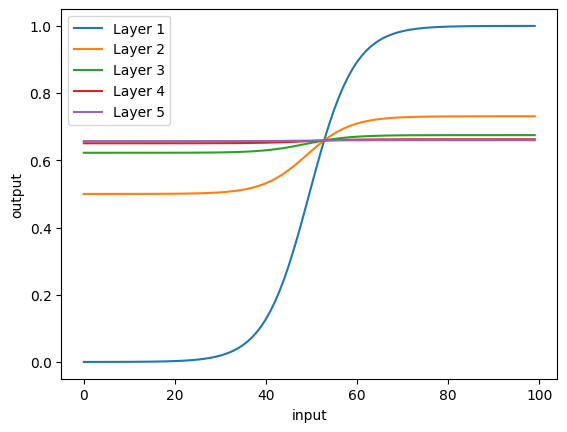

In [14]:
# 시그모이드 활성화함수를 n번 사용한 경우 시각화

x = np.linspace(-10, 10, 100)

for i in range(1, 6): # ==> 1부터 5까지 5바퀴
    x = sigmoid(x)
    plt.plot(x, label=f'Layer {i}')

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.show()

### 기울기 소실 문제 해결
1. sigmoid외에 활성화 함수
2. 잔차연결 (skip connection)


(참고)

**가중치(W)** : 현재 모델의 상태를 대표하는 값 (입력 특성의 여향을 조절하는 파라미터)
**기울기(gradient)** : loss를 줄이기 위해 가중치를 어느 방향으로 얼마나 조정해야 하는지 알려주는 값이다.

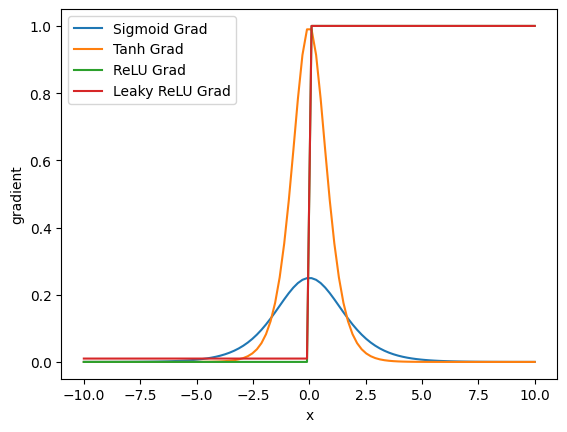

In [18]:
# sigmoid 외 활성화 함수

# 활성화함수에 대한 도함수 : 미분
# ==> 미분 구하는 함수를 그냥 도함수라고 함
def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)
    # ==> 도함수 구하는 공식

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2
    # ==> 도함수 구하는 공식

def relu_grad(x):
    return np.where(x >= 0, 1, 0)
    # ==> 도함수 구하는 공식

def leaky_relu_grad(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x <= 0] = alpha
    return dx
    # ==> 도함수 구하는 공식


# ==> 도함수를 구하는 공식은 이미 정의되어 있는 공식임

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid_grad(x), label='Sigmoid Grad') # ==> 0 ~ 1 사이
plt.plot(x, tanh_grad(x), label='Tanh Grad') # ==> -1 ~ 1 사이
plt.plot(x, relu_grad(x), label='ReLU Grad')
plt.plot(x, leaky_relu_grad(x), label='Leaky ReLU Grad')



plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.show()

In [ ]:
"""
1. 순전파 (feed forward)
    W, b -> 예측값
    W = 가중치
    b = 절편

    이 사이에

    Loss 함수
    1. loss
    2. grad
    loss 함수가 실제로 예측값이랑 실제값 사이에 차이를 계산
    그리고 기울기를 계산

    Optimizer
    3. update
    ==> 옵티마이저가 업데이트 해줌

    실제 차이로부터 얼마나 계산할지 == 기울기

    -> 기울기랑 가중치는 다르다

    이 다음에 역전파로 넘어간다

2. 역전파 (backpropagation)
    손실을 줄이려면 가중치를 어떻게 해

"""
# 가중치 W : 현재 모델이 가지고 있는 값 (지금 상태)
# 기울기 : 가중치를 얼마나 바꿔야 하는지에 대한 정보

In [ ]:
# 잔차연결 Residual Connection (Skip Connection)
import torch
import torch.nn as nn

torch.manual_seed(42)

n_layers = 10
input_dim = 10

# 일반 네트워크
class PlainNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = self.relu(x)
        return x

#
class ResNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.ModuleList([
            nn.Linear(input_dim, input_dim) for _ in range(n_layers)
        ])
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            out = layer(x)
            out = self.relu(out)
            x = x + out
        return x


plain_model = PlainNet()
res_model = ResNet()
criterion = nn.MSELoss() # 손실함수



In [ ]:
# 입력값 / 타겟값
x = torch.randn(1, input_dim)
# 평균 0, 표준편차 1인 정규분포에서 1 * input_dim 크기만큼 샘플림
y = torch.randn(1, input_dim)
x
# => tensor([[-1.5546,  0.3805,  0.2731, -0.0112, -0.4903, -0.2353,
#             -2.0287, -0.0466, -0.5973,  0.1931]])

# 시각화를 위한 기울기 모음
plain_grads = []
res_grads = []

# 1. 일반 모델 학습
output = plain_model(x) # 예측값
loss = criterion(output, y) # 손실 계산
loss.backward() # 오차에 대한 기울기 계산


print('일반모델 기울기 : ')
for i, layer in enumerate(plain_model.layers):
    print(f'Layer {i + 1} : {layer.weight.grad.norm():.4f}')
    # 기울기 크기를 한 숫자로 요약한 값

    # ==> layer.weight :그 레이어의 가중치 tensor
    # ==> layer.weight.grad :그 레이어의 가중치 tensor의 기울기
    # ==> .norm() : 를 하나의 순자로 요약한 값
    plain_grads.append(layer.weight.grad.norm())

# 2. 잔차연결 모델 학습
output = res_model(x) # 예측값
loss = criterion(output, y) # 손실 계산
loss.backward() # 오차에 대한 기울기 계산

print('\n잔차연결 모델 기울기 : ')
for i, layer in enumerate(res_model.layers):
    print(f'Layer {i + 1} : {layer.weight.grad.norm():.4f}')
    # 기울기 크기를 한 숫자로 요약한 값
    res_grads.append(layer.weight.grad.norm())



In [ ]:
# 시각화
plt.figure(figsize=(8,4))
plt.plot(
    range(1, n_layers + 1), plain_grads,
    label='PlainNet Grad', marker='o'
)
plt.plot(
    range(1, n_layers + 1), res_grads,
    label='ResNet Grad', marker='o'
)

plt.xlabel('Layer')
plt.ylabel('Grad')
plt.legend()
plt.grid()
plt.show()